#### From Kevin

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/soumoks/Titanic-Kaggle-Competition/master/train.csv', index_col='PassengerId')
df_test = pd.read_csv('https://raw.githubusercontent.com/soumoks/Titanic-Kaggle-Competition/master/test.csv', index_col='PassengerId')
df = df.append(df_test)

In [47]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


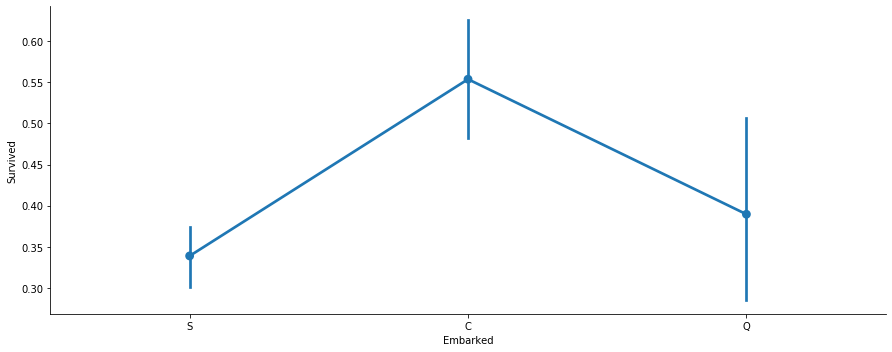

In [48]:
# Fill embarked
# A quick inspect shows that here are 2 embarked values missing. Since this number is
# small, we fill the missing values with the most common class 'S'.
# As demonstrated in the plot, there is definitely a correlation between embarked and 
# the survival rate. Passengers from port 'Southampton' have only 34% of survival rate 
# while those from the port 'Cherbourg' have 55% chance.
df.Embarked = df.Embarked.fillna('S')
axes = sns.factorplot('Embarked','Survived', data=df, aspect = 2.5)
df.Fare = df.Fare.fillna(df.Fare.mean())

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


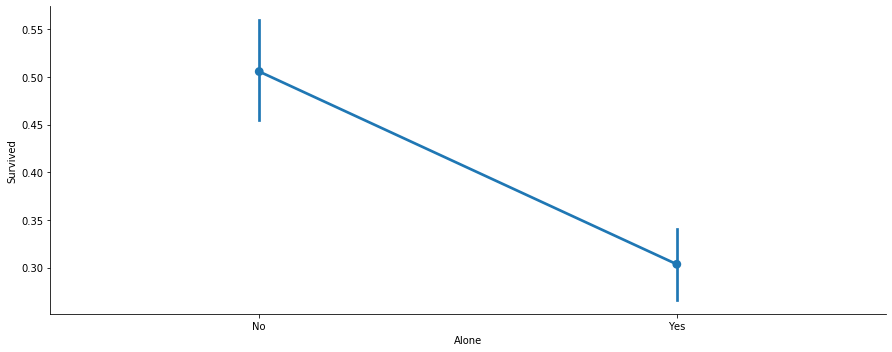

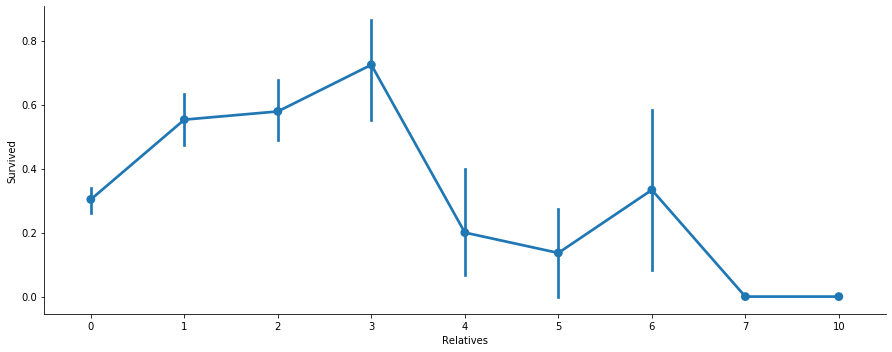

In [49]:
# Add features called Alone and Relatives
# Passengers traveled with families have higher survival rate than travel alone. Also, 
# passengers with 2 to 3 family members on board tends to have better chance of survival.
# As demonstrated in the plot, passenders travaled with 3 family members have 70% survival rate
# while passenger traveled with large family, 7-8 members have 0% survival rate.

df['Relatives'] = df['SibSp'] + df['Parch']
df.loc[df['Relatives'] > 0, 'Alone'] = 'No'
df.loc[df['Relatives'] == 0, 'Alone'] = 'Yes'
axes = sns.factorplot('Alone','Survived', data=df, aspect = 2.5)
axes = sns.factorplot('Relatives','Survived', data=df, aspect = 2.5)

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


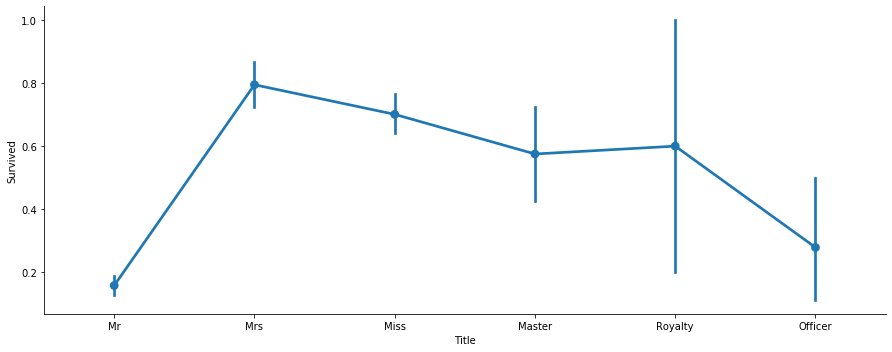

In [50]:
# Extract the passenger's Title from Name
# We created an additonal features called Title to explore the correlation between survival rate
# based on the passenger's social status. The titles can be classified into 3 main categories,
# Royalty, Workers and Civilians. Class worker includes Master and Officers where Offers have
# only 30% survival rate while Masters have about 60%. Royalites also have a high survival rate
# at just above 60%. On the other hand, male civilians do not stand much chance to survive. Only
# 10% of male who are civilian survived. Guess Jack didn't make the cut :(
df2 = df
df2['Title'] = df2.Name
df2.Title = df2.Title.replace(regex={
    r'.*, Capt.*': 'Officer',
    r'.*, Col.*': 'Officer',
    r'.*, Major.*': 'Officer',
    r'.*, Jonkheer.*': 'Royalty',
    r'.*, Don.*': 'Royalty',
    r'.*, Sir.*': 'Royalty',
    r'.*, Dr.*': 'Officer',
    r'.*, Rev.*': 'Officer',
    r'.*, the Countess.*': 'Royalty',
    r'.*, Mme.*': 'Mrs',
    r'.*, Mlle.*': 'Miss',
    r'.*, Ms.*': 'Mrs',
    r'.*, Mrs.*': 'Mrs',
    r'.*, Mr.*': 'Mr',
    r'.*, Miss.*': 'Miss',
    r'.*, Master.*': 'Master',
    r'.*, Lady.*': 'Royalty'
})
axes = sns.factorplot('Title','Survived', data=df2, aspect = 2.5)

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

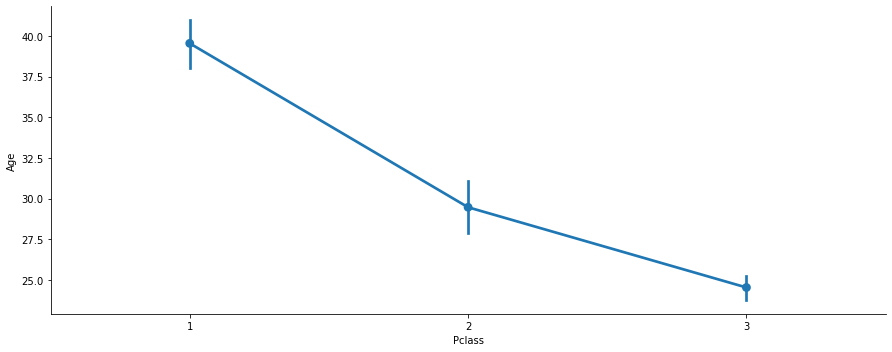

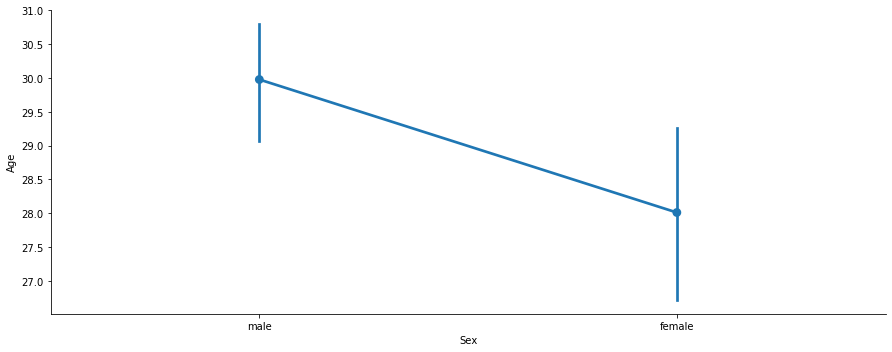

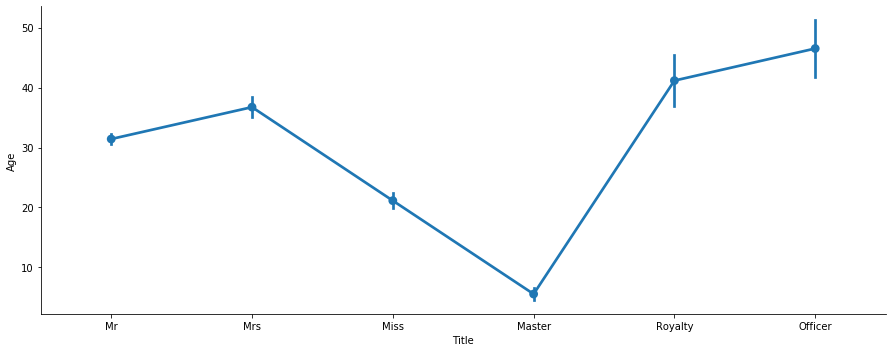

In [51]:
# fill age based on sex, class and title
# A quick inspect using .info() shows there are 263 passengers have the value Age missing. This
# is quite a large amount considering the dataset have only 1309 samples. Filling the age with
# mean would be an option, but may not be the best approach. Instead, we use the median based on
# three other features, Sex, Pclass and Title. As demonstrated in the plots, the passenger's age
# are highly influenced by these three features.
df3 = df2
grouped = df3.groupby(['Sex', 'Pclass', 'Title'])
grouped_median = grouped.median()
grouped_median = grouped_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

def fill_age(row):
    condition = (
        (grouped_median['Sex'] == row['Sex']) &
        (grouped_median['Title'] == row['Title']) &
        (grouped_median['Pclass'] == row['Pclass'])
    )
    if np.isnan(grouped_median[condition]['Age'].values[0]):
        condition = (
            (grouped_median['Sex'] == row['Sex']) &
            (grouped_median['Pclass'] == row['Pclass'])
        )
    return grouped_median[condition]['Age'].values[0]

df3['Age'] = df3.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
axes = sns.factorplot('Pclass','Age', data=df2, aspect = 2.5)
axes = sns.factorplot('Sex','Age', data=df2, aspect = 2.5)
axes = sns.factorplot('Title','Age', data=df2, aspect = 2.5)

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


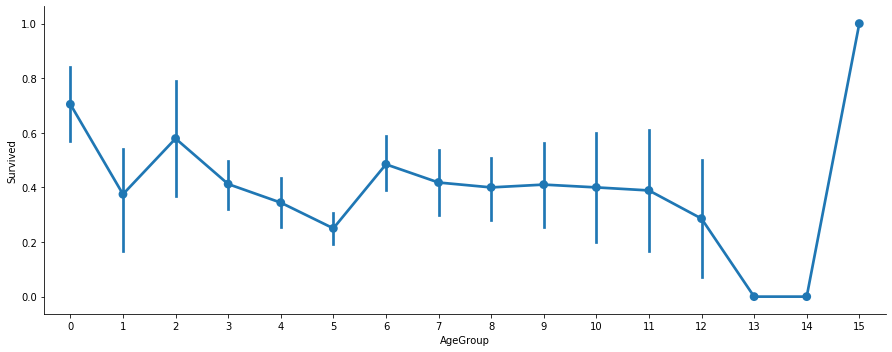

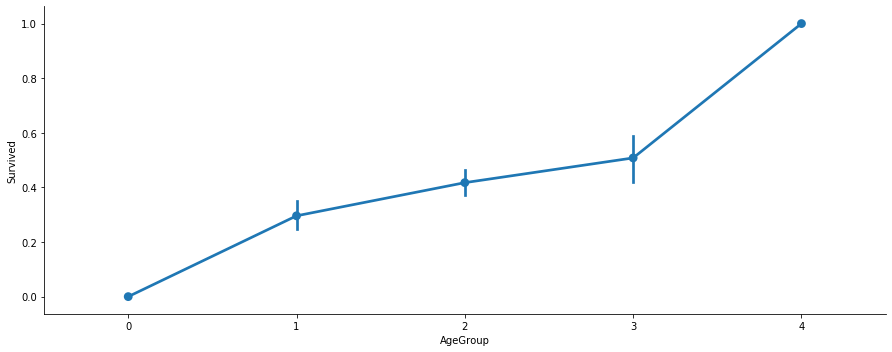

In [52]:
# Add a feature called AgeGroup

bins = list(range(0, 81, 5))
labels = list(range(len(bins)-1))
df3['AgeGroup'] = pd.cut(df3.Age, bins, labels=labels, include_lowest=True)
axes = sns.factorplot('AgeGroup','Survived', data=df3, aspect = 2.5)
df3.AgeGroup = df3.AgeGroup = df.AgeGroup.replace({
    0:3, 
    1:1, 
    2:2, 
    3:2, 
    4:2, 
    5:1, 
    6:2, 
    7:2, 
    8:1, 
    9:3, 
    10:3, 
    11:3, 
    12:1, 
    13:0,
    14:0,
    15:4
})

# let's see how it's distributed train_df['Age'].value_counts()
axes = sns.factorplot('AgeGroup','Survived', data=df3, aspect = 2.5)

C:\Users\soumo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


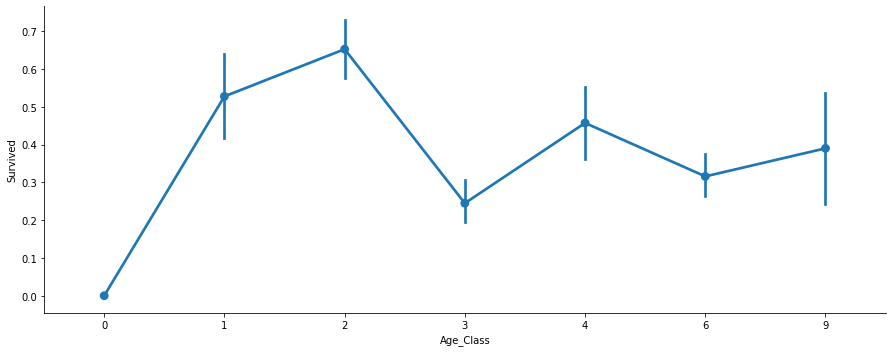

In [53]:
# Add a feature called Age Class

df3['Age_Class']= df3['AgeGroup']* df3['Pclass']
axes = sns.factorplot('Age_Class','Survived', data=df3, aspect = 2.5)

In [54]:
# Convert fare to categories
df3.loc[df3['Fare'] <= 7.91, 'Fare'] = 0
df3.loc[(df3['Fare'] > 7.91) & (df3['Fare'] <= 14.454), 'Fare'] = 1
df3.loc[(df3['Fare'] > 14.454) & (df3['Fare'] <= 31), 'Fare'] = 2
df3.loc[(df3['Fare'] > 31) & (df3['Fare'] <= 99), 'Fare'] = 3
df3.loc[(df3['Fare'] > 99) & (df3['Fare'] <= 250), 'Fare'] = 4
df3.loc[ df3['Fare'] > 250, 'Fare'] = 5
df3['Fare'] = df3['Fare'].astype(int)

In [55]:
# %%
df3['Fare_Per_Person'] = df3['Fare']/(df3['Relatives']+1)
df3['Fare_Per_Person'] = df3['Fare_Per_Person'].astype(int)

In [56]:
df4 = df3
df4 = df4.loc[:, ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives', 'Age_Class', 'Embarked', 'Pclass']]
#df4 = df4.loc[:, ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives', 'Embarked', 'Pclass']]
#df4 = df4.loc[:, ['Sex', 'Title', 'SibSp', 'AgeGroup', 'Fare_Per_Person', 'Age_Class', 'Fare', 'Relatives', 'Embarked', 'Pclass']]
labels = df3['Survived'].dropna()
df4.head()

,Sex,Title,AgeGroup,Fare,Relatives,Age_Class,Embarked,Pclass
PassengerId,,,,,,,,
1,male,Mr,2,0,1,6,S,3
2,female,Mrs,2,3,1,2,C,1
3,female,Miss,1,1,0,3,S,3
4,female,Mrs,2,3,1,2,S,1
5,male,Mr,2,1,0,6,S,3


In [57]:
#map sex, embarked, and title to numeric
ports = {"S": 0, 'C':1, 'Q':2}
num_sex = {"male":0,"female":1}
num_title = {"Mr": 0, "Mrs":1, "Miss": 2, "Master":3,"Royalty":4,"Officer":5}
df4['Sex'] = df4['Sex'].map(num_sex)
df4['Embarked'] = df4['Embarked'].map(ports)
df4['Title'] = df4['Title'].map(num_title)
df4
df5 = df4.drop('Age_Class', axis =1)
df5.head()

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass
PassengerId,,,,,,,
1,0,0,2,0,1,0,3
2,1,1,2,3,1,1,1
3,1,2,1,1,0,0,3
4,1,1,2,3,1,0,1
5,0,0,2,1,0,0,3


In [58]:
from sklearn.preprocessing import StandardScaler

numeric_features = list(df5.select_dtypes(include=['int64', 'float64', 'int32']).columns)
scaler = StandardScaler()
df5[numeric_features] = scaler.fit_transform(df5[numeric_features])
df5.head()

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass
PassengerId,,,,,,,
1,-0.743497,-0.715617,0.353004,-1.248109,0.073352,-0.603436,0.841916
2,1.344995,0.179930,0.353004,1.124265,0.073352,0.927373,-1.546098
3,1.344995,1.075478,-1.091002,-0.457318,-0.558346,-0.603436,0.841916
4,1.344995,0.179930,0.353004,1.124265,0.073352,-0.603436,-1.546098
5,-0.743497,-0.715617,0.353004,-0.457318,-0.558346,-0.603436,0.841916


In [59]:
# # One-Hot encoding
# encode_features = list(df4.select_dtypes(include=['object']).columns)
# for feature in encode_features:
#     df4 = pd.concat([df4, pd.get_dummies(df4[feature], prefix=feature)],axis=1)
#     df4.drop(feature, axis = 1, inplace=True)

In [61]:
# Train a RandomForst model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
df_train = df5[:891]
y = labels.to_numpy()
X = df_train.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=1888, min_samples_split=5, min_samples_leaf=3, max_features='sqrt', max_depth=11, bootstrap=False)
#clf = RandomForestClassifier(n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features='auto', max_depth=5, bootstrap=True)

clf.fit(X, y)
print('RandomForst, Train score:', cross_val_score(clf, X_train, y_train, cv=10).mean())
print('RandomForst, Test score:', cross_val_score(clf, X_test, y_test, cv=10).mean())


KeyboardInterrupt: 

#### Let's prepare a standard dataset for train and test

In [69]:
df_standard_data = df5
df_standard_data['Survived'] = labels
df_standard_data.to_csv('cleaned_train_test.csv')

In [0]:
df_train.head()

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass
PassengerId,,,,,,,
1,-0.743497,-0.715617,0.353004,-1.248109,0.073352,-0.603436,0.841916
2,1.344995,0.179930,0.353004,1.124265,0.073352,0.927373,-1.546098
3,1.344995,1.075478,-1.091002,-0.457318,-0.558346,-0.603436,0.841916
4,1.344995,0.179930,0.353004,1.124265,0.073352,-0.603436,-1.546098
5,-0.743497,-0.715617,0.353004,-0.457318,-0.558346,-0.603436,0.841916


In [0]:
importances = pd.DataFrame({'feature':df_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(25)

,importance
feature,
Title,0.313
Sex,0.245
Pclass,0.153
Relatives,0.115
Fare,0.095
AgeGroup,0.048
Embarked,0.032


In [0]:
# Train a Decision Tree model
# clf = tree.DecisionTreeClassifier()
# clf.fit(X_train, y_train)
# #print(clf.score(X_test, y_test))
# print('DecisionTree, Train score:', cross_val_score(clf, X_train, y_train, cv=20).mean())
# print('DecisionTree, Test score:', cross_val_score(clf, X_test, y_test, cv=20).mean())

In [0]:
# Add result to test set
res = clf.predict(df5[891:].to_numpy()).astype(int)
df_test['Survived'] = res

In [0]:
# Prepare result file
df_res = df_test.loc[:,'Survived']
df_res.to_csv('results.csv', index = True, header=True)

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40,60, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 4, 5, 6, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_features = [2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# {'bootstrap': [True, False],
#  'max_depth': [40, 45, 50, 55, 60, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [600, 650, 700, 750, 800, 850, 900, 950, 1000]}


rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print('Score:', rf_random.score(X, y))
print('Best parameters:', rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


Score: 0.8765432098765432
Best parameters: {'n_estimators': 400, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 60, 'bootstrap': True}


### PCA Analysis

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca =PCA().fit(X_train)
X_train_pca=pca.transform(X_train)

n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df5.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
d = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df6 = pd.DataFrame(d.items())
# df6

explained_variance = pca.explained_variance_ratio_
explained_variance
# components = pca.components_
# # for item in zip(df5.columns, explained_variance):
# #     print(item)
# components

array([0.32495111, 0.18822842, 0.15310876, 0.13506176, 0.10984951,
       0.06448998, 0.02431045])

#### Creating a dataframe to store the results of Feature combinations and accuracy

In [0]:
df_feature_combination = pd.DataFrame(columns=['Combination','Features','Train Score','Test Score'])

In [0]:
df_feature_combination

,Combination,Features,Train Score,Test Score


In [0]:
def populate_featureCombo(combo,features,train_score,test_score):
    global df_feature_combination
    df_feature_combination = df_feature_combination.append({'Combination':combo, 'Features':features,'Train Score':train_score,'Test Score':test_score},ignore_index=True)

### Feature Combinations

In [0]:
from itertools import combinations 
comb = list(combinations(df5.columns, 1))

i = 1
for c in comb:
    feature_list = [x for x in c]
    df_t = df_train[df_train.columns.intersection(feature_list)]

    y = labels.to_numpy()
    X = df_t.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=60, bootstrap=True)
    clf.fit(X, y)
    print('Features: ', feature_list)
    train_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    test_score = cross_val_score(clf, X_test, y_test, cv=10).mean()
    print(i,' RandomForst, Train score:', train_score)
    print(i,' RandomForst, Test score:', test_score)
    i+=1
    populate_featureCombo(1,feature_list,train_score,test_score)
    # df_feature_combination['Combination'] = 1
    # df_feature_combination['Features'] = feature_list
    # df_feature_combination['Train Score'] = cross_val_score(clf, X_train, y_train, cv=10).mean()
    # df_feature_combination['Test Score'] = cross_val_score(clf, X_test, y_test, cv=10).mean()

Features:  ['Sex']
1  RandomForst, Train score: 0.7906885758998434
1  RandomForst, Test score: 0.7715686274509803
Features:  ['Title']
2  RandomForst, Train score: 0.7865805946791862
2  RandomForst, Test score: 0.7937908496732027
Features:  ['AgeGroup']
3  RandomForst, Train score: 0.6081377151799687
3  RandomForst, Test score: 0.5980392156862746
Features:  ['Fare']
4  RandomForst, Train score: 0.6305946791862285
4  RandomForst, Test score: 0.692483660130719
Features:  ['Relatives']
5  RandomForst, Train score: 0.6656103286384976
5  RandomForst, Test score: 0.6473856209150327
Features:  ['Embarked']
6  RandomForst, Train score: 0.6179186228482003
6  RandomForst, Test score: 0.6879084967320261
Features:  ['Pclass']
7  RandomForst, Train score: 0.6825117370892018
7  RandomForst, Test score: 0.6869281045751634


In [0]:
df_feature_combination

,Combination,Features,Train Score,Test Score
0,1,[Sex],0.790689,0.771569
1,1,[Title],0.786581,0.793791
2,1,[AgeGroup],0.608138,0.598039
3,1,[Fare],0.630595,0.692484
4,1,[Relatives],0.665610,0.647386
5,1,[Embarked],0.617919,0.687908
6,1,[Pclass],0.682512,0.686928


In [0]:
from itertools import combinations 
comb = list(combinations(df5.columns, 2))

i = 1
for c in comb:
    feature_list = [x for x in c]
    df_t = df_train[df_train.columns.intersection(feature_list)]

    y = labels.to_numpy()
    X = df_t.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=60, bootstrap=True)
    clf.fit(X, y)
    train_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    test_score = cross_val_score(clf, X_test, y_test, cv=10).mean()
    print(i,' RandomForst, Train score:', train_score)
    print(i,' RandomForst, Test score:', test_score)
    i+=1
    populate_featureCombo(2,feature_list,train_score,test_score)

1  RandomForst, Train score: 0.8033841940532082
1  RandomForst, Test score: 0.7549019607843137
2  RandomForst, Train score: 0.7908450704225352
2  RandomForst, Test score: 0.7718954248366013
3  RandomForst, Train score: 0.7710485133020344
3  RandomForst, Test score: 0.8267973856209151
4  RandomForst, Train score: 0.8004694835680752
4  RandomForst, Test score: 0.7656862745098039
5  RandomForst, Train score: 0.7780907668231613
5  RandomForst, Test score: 0.8205882352941176
6  RandomForst, Train score: 0.776643192488263
6  RandomForst, Test score: 0.8274509803921568
7  RandomForst, Train score: 0.7781298904538342
7  RandomForst, Test score: 0.7931372549019607
8  RandomForst, Train score: 0.7934859154929577
8  RandomForst, Test score: 0.7591503267973857
9  RandomForst, Train score: 0.8286384976525822
9  RandomForst, Test score: 0.75359477124183
10  RandomForst, Train score: 0.7964397496087636
10  RandomForst, Test score: 0.7702614379084968
11  RandomForst, Train score: 0.7822965571205007
11

In [0]:
from itertools import combinations 
comb = list(combinations(df5.columns, 3))

i = 1
for c in comb:
    feature_list = [x for x in c]
    df_t = df_train[df_train.columns.intersection(feature_list)]

    y = labels.to_numpy()
    X = df_t.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=60, bootstrap=True)
    clf.fit(X, y)
    print('Features: ', feature_list)
    train_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    test_score = cross_val_score(clf, X_test, y_test, cv=10).mean()
    print(i,' RandomForst, Train score:', train_score)
    print(i,' RandomForst, Test score:', test_score)
    i+=1
    populate_featureCombo(3,feature_list,train_score,test_score)

Features:  ['Sex', 'Title', 'AgeGroup']
1  RandomForst, Train score: 0.7793818466353678
1  RandomForst, Test score: 0.815686274509804
Features:  ['Sex', 'Title', 'Fare']
2  RandomForst, Train score: 0.8048513302034429
2  RandomForst, Test score: 0.7774509803921569
Features:  ['Sex', 'Title', 'Relatives']
3  RandomForst, Train score: 0.8216158059467918
3  RandomForst, Test score: 0.8320261437908496
Features:  ['Sex', 'Title', 'Embarked']
4  RandomForst, Train score: 0.8019561815336465
4  RandomForst, Test score: 0.7601307189542484
Features:  ['Sex', 'Title', 'Pclass']
5  RandomForst, Train score: 0.7836267605633802
5  RandomForst, Test score: 0.7937908496732027
Features:  ['Sex', 'AgeGroup', 'Fare']
6  RandomForst, Train score: 0.7906885758998434
6  RandomForst, Test score: 0.765359477124183
Features:  ['Sex', 'AgeGroup', 'Relatives']
7  RandomForst, Train score: 0.8034233176838811
7  RandomForst, Test score: 0.7702614379084968
Features:  ['Sex', 'AgeGroup', 'Embarked']
8  RandomForst, 

In [0]:
from itertools import combinations 
comb = list(combinations(df5.columns, 4))

i = 1
for c in comb:
    feature_list = [x for x in c]
    df_t = df_train[df_train.columns.intersection(feature_list)]

    y = labels.to_numpy()
    X = df_t.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=60, bootstrap=True)
    clf.fit(X, y)
    print('Features: ', feature_list)
    train_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    test_score = cross_val_score(clf, X_test, y_test, cv=10).mean()
    print(i,' RandomForst, Train score:', train_score)
    print(i,' RandomForst, Test score:', test_score)
    i+=1
    populate_featureCombo(4,feature_list,train_score,test_score)

Features:  ['Sex', 'Title', 'AgeGroup', 'Fare']
1  RandomForst, Train score: 0.7765845070422535
1  RandomForst, Test score: 0.7820261437908498
Features:  ['Sex', 'Title', 'AgeGroup', 'Relatives']
2  RandomForst, Train score: 0.799021909233177
2  RandomForst, Test score: 0.8496732026143791
Features:  ['Sex', 'Title', 'AgeGroup', 'Embarked']
3  RandomForst, Train score: 0.8018192488262912
3  RandomForst, Test score: 0.7209150326797386
Features:  ['Sex', 'Title', 'AgeGroup', 'Pclass']
4  RandomForst, Train score: 0.7950508607198749
4  RandomForst, Test score: 0.7091503267973855
Features:  ['Sex', 'Title', 'Fare', 'Relatives']
5  RandomForst, Train score: 0.8216549295774648
5  RandomForst, Test score: 0.781372549019608
Features:  ['Sex', 'Title', 'Fare', 'Embarked']
6  RandomForst, Train score: 0.7920970266040689
6  RandomForst, Test score: 0.753267973856209
Features:  ['Sex', 'Title', 'Fare', 'Pclass']
7  RandomForst, Train score: 0.7990805946791862
7  RandomForst, Test score: 0.799673202

In [0]:
from itertools import combinations 
comb = list(combinations(df5.columns, 5))

i = 1
for c in comb:
    feature_list = [x for x in c]
    df_t = df_train[df_train.columns.intersection(feature_list)]

    y = labels.to_numpy()
    X = df_t.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=60, bootstrap=True)
    clf.fit(X, y)
    print('Features: ', feature_list)
    train_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    test_score = cross_val_score(clf, X_test, y_test, cv=10).mean()
    print(i,' RandomForst, Train score:', train_score)
    print(i,' RandomForst, Test score:', test_score)
    i+=1
    populate_featureCombo(5,feature_list,train_score,test_score)

Features:  ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives']
1  RandomForst, Train score: 0.802073552425665
1  RandomForst, Test score: 0.8163398692810457
Features:  ['Sex', 'Title', 'AgeGroup', 'Fare', 'Embarked']
2  RandomForst, Train score: 0.7892214397496087
2  RandomForst, Test score: 0.7598039215686274
Features:  ['Sex', 'Title', 'AgeGroup', 'Fare', 'Pclass']
3  RandomForst, Train score: 0.8160602503912363
3  RandomForst, Test score: 0.7990196078431373
Features:  ['Sex', 'Title', 'AgeGroup', 'Relatives', 'Embarked']
4  RandomForst, Train score: 0.8258998435054773
4  RandomForst, Test score: 0.7761437908496733
Features:  ['Sex', 'Title', 'AgeGroup', 'Relatives', 'Pclass']
5  RandomForst, Train score: 0.8257433489827857
5  RandomForst, Test score: 0.8153594771241831
Features:  ['Sex', 'Title', 'AgeGroup', 'Embarked', 'Pclass']
6  RandomForst, Train score: 0.8062793427230046
6  RandomForst, Test score: 0.8434640522875817
Features:  ['Sex', 'Title', 'Fare', 'Relatives', 'Embarked']
7

In [0]:
from itertools import combinations 
comb = list(combinations(df5.columns, 6))

i = 1
for c in comb:
    feature_list = [x for x in c]
    df_t = df_train[df_train.columns.intersection(feature_list)]

    y = labels.to_numpy()
    X = df_t.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=60, bootstrap=True)
    clf.fit(X, y)
    print('Features: ', feature_list)
    train_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    test_score = cross_val_score(clf, X_test, y_test, cv=10).mean()
    print(i,' RandomForst, Train score:', train_score)
    print(i,' RandomForst, Test score:', test_score)
    i+=1
    populate_featureCombo(6,feature_list,train_score,test_score)

Features:  ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives', 'Embarked']
1  RandomForst, Train score: 0.810348200312989
1  RandomForst, Test score: 0.7598039215686274
Features:  ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives', 'Pclass']
2  RandomForst, Train score: 0.8439945226917057
2  RandomForst, Test score: 0.7879084967320262
Features:  ['Sex', 'Title', 'AgeGroup', 'Fare', 'Embarked', 'Pclass']
3  RandomForst, Train score: 0.8190140845070422
3  RandomForst, Test score: 0.7313725490196079
Features:  ['Sex', 'Title', 'AgeGroup', 'Relatives', 'Embarked', 'Pclass']
4  RandomForst, Train score: 0.8370500782472613
4  RandomForst, Test score: 0.7709150326797385
Features:  ['Sex', 'Title', 'Fare', 'Relatives', 'Embarked', 'Pclass']
5  RandomForst, Train score: 0.827406103286385
5  RandomForst, Test score: 0.7872549019607843
Features:  ['Sex', 'AgeGroup', 'Fare', 'Relatives', 'Embarked', 'Pclass']
6  RandomForst, Train score: 0.8048708920187794
6  RandomForst, Test score: 0.804575163398692

In [0]:
comb = list(combinations(df5.columns, 7))

i = 1
for c in comb:
    feature_list = [x for x in c]
    df_t = df_train[df_train.columns.intersection(feature_list)]

    y = labels.to_numpy()
    X = df_t.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=60, bootstrap=True)
    clf.fit(X, y)
    print('Features: ', feature_list)
    train_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
    test_score = cross_val_score(clf, X_test, y_test, cv=10).mean()
    print(i,' RandomForst, Train score:', train_score)
    print(i,' RandomForst, Test score:', test_score)
    i+=1
    populate_featureCombo(7,feature_list,train_score,test_score)

Features:  ['Sex', 'Title', 'AgeGroup', 'Fare', 'Relatives', 'Embarked', 'Pclass']
1  RandomForst, Train score: 0.8272300469483568
1  RandomForst, Test score: 0.7826797385620916


In [0]:
df_feature_combination

,Combination,Features,Train Score,Test Score
0,1,[Sex],0.790689,0.771569
1,1,[Title],0.786581,0.793791
2,1,[AgeGroup],0.608138,0.598039
3,1,[Fare],0.630595,0.692484
4,1,[Relatives],0.665610,0.647386
...,...,...,...,...
122,6,"[Sex, Title, AgeGroup, Relatives, Embarked, Pc...",0.837050,0.770915
123,6,"[Sex, Title, Fare, Relatives, Embarked, Pclass]",0.827406,0.787255
124,6,"[Sex, AgeGroup, Fare, Relatives, Embarked, Pcl...",0.804871,0.804575
125,6,"[Title, AgeGroup, Fare, Relatives, Embarked, P...",0.816021,0.793137


In [0]:
df_feature_combination = df_feature_combination.sort_values(by='Test Score',ascending=False)

In [0]:
df_feature_combination.head(5)

,Combination,Features,Train Score,Test Score
64,4,"[Sex, Title, AgeGroup, Relatives]",0.799022,0.849673
103,5,"[Sex, Title, AgeGroup, Embarked, Pclass]",0.806279,0.843464
104,5,"[Sex, Title, Fare, Relatives, Embarked]",0.813106,0.837908
105,5,"[Sex, Title, Fare, Relatives, Pclass]",0.817410,0.832353
113,5,"[Title, AgeGroup, Fare, Relatives, Embarked]",0.818760,0.832353



#### Training using the above features
Model1 with [Sex, Title, AgeGroup, Relatives]	
Model2 with [Sex, Title, AgeGroup, Embarked, Pclass]
Model3 with [Sex, Title, Fare, Relatives, Embarked]	

In [35]:
df6 = df5.loc[:,['Sex', 'Title', 'AgeGroup', 'Relatives']]

In [36]:
df6

,Sex,Title,AgeGroup,Relatives
PassengerId,,,,
1,-0.743497,-0.715617,0.353004,0.073352
2,1.344995,0.179930,0.353004,0.073352
3,1.344995,1.075478,-1.091002,-0.558346
4,1.344995,0.179930,0.353004,0.073352
5,-0.743497,-0.715617,0.353004,-0.558346
...,...,...,...,...
1305,-0.743497,-0.715617,-1.091002,-0.558346
1306,1.344995,2.866573,0.353004,-0.558346
1307,-0.743497,-0.715617,0.353004,-0.558346


In [37]:
# Train a RandomForst model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# df_train = df5[:891]
df_model1_train = df6[:891]
y = labels.to_numpy()
X = df_model1_train.to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=1888, min_samples_split=5, min_samples_leaf=3, max_features=4, max_depth=11, bootstrap=False)
#clf = RandomForestClassifier(n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features='auto', max_depth=5, bootstrap=True)

clf.fit(X, y)
print('RandomForst, Train score:', cross_val_score(clf, X_train, y_train, cv=10).mean())
print('RandomForst, Test score:', cross_val_score(clf, X_test, y_test, cv=10).mean())

RandomForst, Train score: 0.8145539906103286
RandomForst, Test score: 0.8274509803921568


#### Optimizing the above model further with Hyperparameter tuning

In [0]:
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40,60, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 4, 5, 6, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_features = [2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               

In [0]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print('Score:', rf_random.score(X, y))
print('Best parameters:', rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


Score: 0.8294051627384961
Best parameters: {'n_estimators': 800, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 40, 'bootstrap': True}


In [38]:
clf_optimised = RandomForestClassifier(n_estimators=800, min_samples_split=4,max_features=4,min_samples_leaf=5, max_depth=55, bootstrap=True)

In [39]:
clf_optimised.fit(X, y)
print('RandomForst, Train score:', cross_val_score(clf, X_train, y_train, cv=10).mean())
print('RandomForst, Test score:', cross_val_score(clf, X_test, y_test, cv=10).mean())

RandomForst, Train score: 0.8145539906103286
RandomForst, Test score: 0.8274509803921568


In [40]:
res_optimised = clf_optimised.predict(df6[891:].to_numpy()).astype(int)

In [41]:
res_optimised.shape

(418,)

#### Creating a csv file for Kaggle submission


In [42]:
def create_submission(results):
  """
  Accepts a numpy array
  """
  global df_test
  df_test['Survived'] = results
  df_res = df_test.loc[:,'Survived']
  df_res.to_csv('results.csv', index = True, header=True)
  

In [43]:
create_submission(res_optimised)